In [18]:
import pandas as pd # Working with dataframes
from urllib import request # Downloading data from an URL
from matplotlib import pyplot as plt # Plotting figures

The `request.urlretrieve` function ([see reference](https://realpython.com/python-download-file-from-url/)) downloads data from a given URL

In [ ]:
# Define the URL to use it later with urlretrieve
URL = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
# Define the .csv filename while including the path to the data folder.
filename = "../data/peoples_email_domains.csv"
# Retrieve the data and save it as .csv file to the data folder
request.urlretrieve(URL, filename)

('../data/peoples_email_domains.csv',
 <http.client.HTTPMessage at 0x7b890788ac90>)

In [ ]:
# Load in the csv file from the data folder
df = pd.read_csv("../data/peoples_email_domains.csv", index_col=0)
df.head() # Show the first five rows

,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
Index,,,,,,,,
1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


The `pandas.Series.str.split` function ([see official documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)) splits the pandas dataframe column based on the parameters.

The `pandas.DataFrame.value_counts` function ([see official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)) Calculates the frequency of values in a dataframe.

In [ ]:
# Use str.split function to split the Email column into two columns.
# Add the second column to the df so you could calculate the frequency of email domains
df["Email Domains"] = df["Email"].str.split("@", expand=True)[1]


# Use value_counts to calculate the frequency of email domains 
domain_count = df["Email Domains"].value_counts()

In [ ]:
# Store the labels (email domains) for the pie chart 
labels = domain_count.index
# Store the frequency of email domains for the pie chart
counts = domain_count.values

This is an example used to create the function that modifies the text of the autopct parameter of the pyplot.axes.pie function ([see official documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py)).

In [95]:
def func(pct, allvals):
    """
    This is function customises the text for the autopct parameter of the pyplot.pie function.

    Args:
        pct(float): the percentage of the value.
        allvals(array): the input values to the pyplot.pie function

    Returns: customised text with two values, the value and the percentage.
    """
    # Calculates the value given the percentage of the total counts
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    # Returns the string with the value and the percentage
    return f"{absolute:d}\n({pct:.1f}%)"

Here is explained the basics how to plot pie charts with pyplot package ([see official documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)).

Here is the list of colors used to define the colors of the wedges in the pyplot.pie function ([see reference](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)).

Here is an example on how to customise text in pyplot ([see reference](https://brandonrohrer.com/matplotlib_text.html)). This example was used to customise the text of the textprops parameter of the pyplot.pie function. To place the white text in the black box for better visualisation.


The `matplotlib.axes.Axes.legend` function ([see reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html )) allows to add a legend to a plot. It also enables to change its appearance including the position on the plot.

Text(0.5, 1.0, 'Frequency of Email Domains')

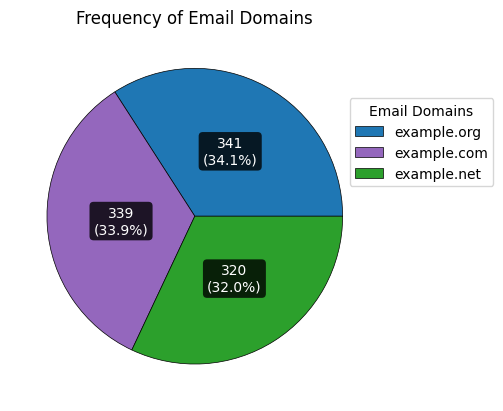

In [ ]:
# Create the axes for plotting 
fig, ax = plt.subplots()
# Plot the pie plot
ax.pie(
    counts, 
    labels=labels, 
    autopct=lambda pct: func(pct, counts), # Customise the autopct text
    colors=['tab:blue', 'tab:purple', 'tab:green'], # Select the colors for wedges
    pctdistance=0.5, # Select the cordinates on the plot for the pct text 
    labeldistance=None, # Remove the labels from the plot
    wedgeprops={'linewidth': 0.5, "edgecolor":"black"}, # Customise wedges appearance
    # Customise the text of the textprops while using the function previously defined function
    textprops=dict( 
        color="w",  
        bbox=dict(  
            boxstyle='round,pad=0.3',  
            facecolor='black',         
            edgecolor='none',          
            alpha=0.8                  
        ))
    )

# Set the cordinates of the legend so that it would be outside the pie chart
ax.legend(
    title="Email Domains",
    loc="center left",
    bbox_to_anchor=(0.9, 0.7)
    )
# Set the title of the plot
ax.set_title("Frequency of Email Domains")